# **Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


# **Load Dataset**

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [3]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [10]:
#X_train[0]

In [12]:
#y_train[0]

In [5]:
class_labels = ['0: T-Shirt/Top', '1: Trouser', '2: Pullover', '3: Dress', '4: Coat', '5: Sandal', '6: Shirt', '7: Sneakers', '8: Bag', '9: Ankle Boot']
class_labels

['0: T-Shirt/Top',
 '1: Trouser',
 '2: Pullover',
 '3: Dress',
 '4: Coat',
 '5: Sandal',
 '6: Shirt',
 '7: Sneakers',
 '8: Bag',
 '9: Ankle Boot']

**Show Image**

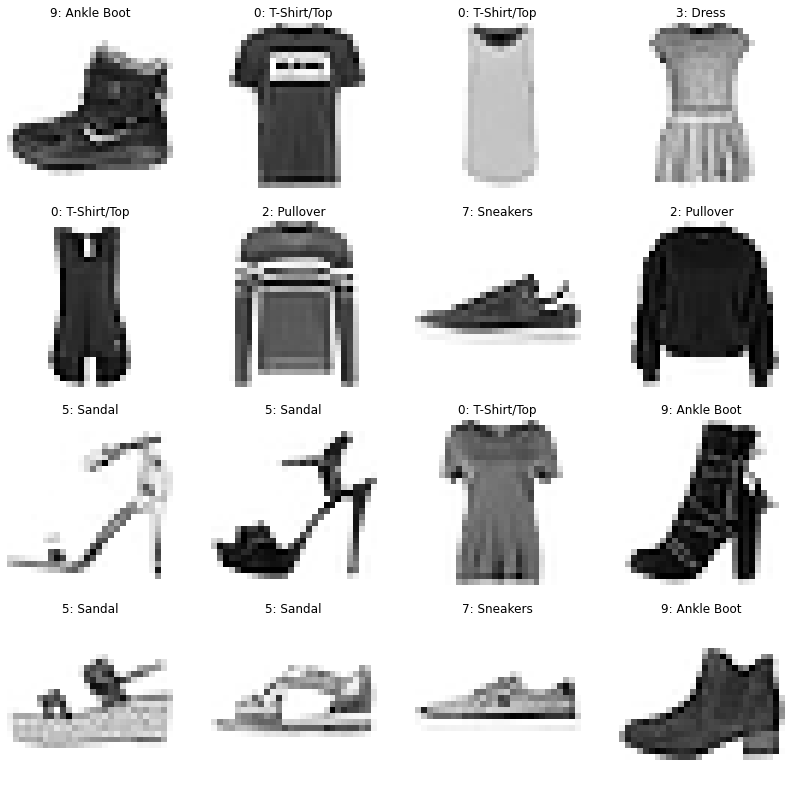

In [6]:
plt.figure(figsize=(14,14))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(X_train[i], cmap='Greys')
  plt.axis('off')
  plt.title(class_labels[y_train[i]])

**Expand Dimension**

In [7]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_test.shape

(10000, 28, 28, 1)

**Feature Scaling**

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
#X_train[0]

**Split Dataset**

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [13]:
X_train.shape, y_train.shape

((48000, 28, 28, 1), (48000,))

In [14]:
X_val.shape, y_val.shape

((12000, 28, 28, 1), (12000,))

# Convolution Neural Network - Model building

In [17]:
model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


**Compile the Model**

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Train the Model**

In [20]:
model.fit(X_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 148us/step - loss: 0.8006 - accuracy: 0.7453 - val_loss: 0.4756 - val_accuracy: 0.8347
Epoch 2/10
48000/48000 [==============================] - 1s 26us/step - loss: 0.4251 - accuracy: 0.8522 - val_loss: 0.3922 - val_accuracy: 0.8628
Epoch 3/10
48000/48000 [==============================] - 1s 25us/step - loss: 0.3708 - accuracy: 0.8723 - val_loss: 0.3588 - val_accuracy: 0.8736
Epoch 4/10
48000/48000 [==============================] - 1s 26us/step - loss: 0.3474 - accuracy: 0.8788 - val_loss: 0.3321 - val_accuracy: 0.8830
Epoch 5/10
48000/48000 [==============================] - 1s 26us/step - loss: 0.3168 - accuracy: 0.8900 - val_loss: 0.3188 - val_accuracy: 0.8892
Epoch 6/10
48000/48000 [==============================] - 1s 26us/step - loss: 0.3068 - accuracy: 0.8926 - val_loss: 0.3055 - val_accuracy: 0.8926
Epoch 7/10
48000/48000 [==============================] - 1s 26us/s

**Test the Model**

In [21]:
np.argmax(model.predict(np.expand_dims(X_test[0], axis=0)).round(2))

9

In [22]:
y_test[0]

9

In [23]:
y_pred = model.predict(X_test).round(2)

**Evaluate the Model on Test data**

In [24]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 83us/step


[0.2980619600057602, 0.8892999887466431]

**Confusion Matrix & Classification Report**

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

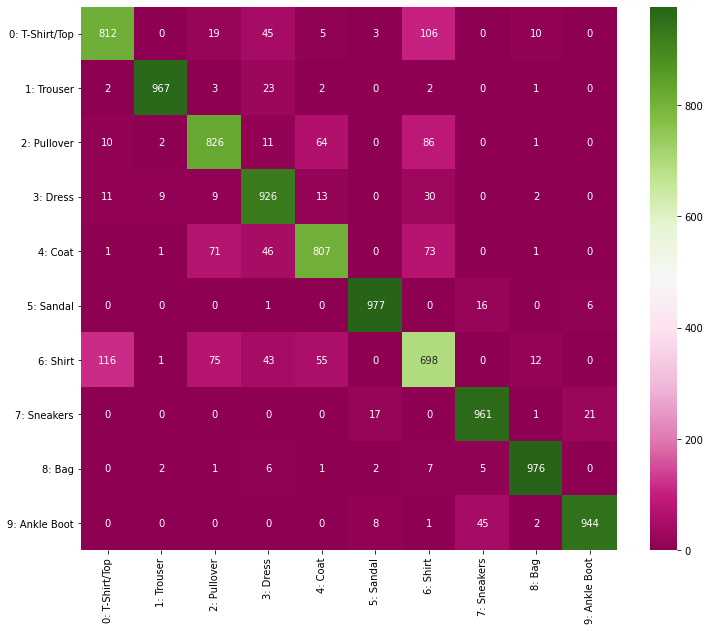

In [26]:
plt.figure(figsize=(12,10))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm= confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='PiYG',xticklabels=class_labels, yticklabels=class_labels)

In [27]:
cr = classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

                precision    recall  f1-score   support

0: T-Shirt/Top       0.85      0.81      0.83      1000
    1: Trouser       0.98      0.97      0.98      1000
   2: Pullover       0.82      0.83      0.82      1000
      3: Dress       0.84      0.93      0.88      1000
       4: Coat       0.85      0.81      0.83      1000
     5: Sandal       0.97      0.98      0.97      1000
      6: Shirt       0.70      0.70      0.70      1000
   7: Sneakers       0.94      0.96      0.95      1000
        8: Bag       0.97      0.98      0.97      1000
 9: Ankle Boot       0.97      0.94      0.96      1000

      accuracy                           0.89     10000
     macro avg       0.89      0.89      0.89     10000
  weighted avg       0.89      0.89      0.89     10000



# Building Complex Model

In [30]:
model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),

                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),

                         keras.layers.Flatten(),

                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),

                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [32]:
#Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
#Train the Model
model.fit(X_train, y_train, epochs=50, batch_size=1000, verbose=1, validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 38us/step - loss: 0.2316 - accuracy: 0.9143 - val_loss: 0.2599 - val_accuracy: 0.9047
Epoch 2/50
48000/48000 [==============================] - 2s 35us/step - loss: 0.2285 - accuracy: 0.9168 - val_loss: 0.2562 - val_accuracy: 0.9078
Epoch 3/50
48000/48000 [==============================] - 2s 35us/step - loss: 0.2254 - accuracy: 0.9179 - val_loss: 0.2544 - val_accuracy: 0.9082
Epoch 4/50
48000/48000 [==============================] - 2s 35us/step - loss: 0.2209 - accuracy: 0.9171 - val_loss: 0.2570 - val_accuracy: 0.9059
Epoch 5/50
48000/48000 [==============================] - 2s 34us/step - loss: 0.2181 - accuracy: 0.9177 - val_loss: 0.2585 - val_accuracy: 0.9045
Epoch 6/50
48000/48000 [==============================] - 2s 35us/step - loss: 0.2086 - accuracy: 0.9228 - val_loss: 0.2526 - val_accuracy: 0.9069
Epoch 7/50
48000/48000 [==============================] - 2s 35us/st

In [36]:
#Evaluate the Model
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 96us/step


[0.33876899072527883, 0.9074000120162964]

In [38]:
#Confusion Matrix & Classification Report
cr = classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

                precision    recall  f1-score   support

0: T-Shirt/Top       0.85      0.81      0.83      1000
    1: Trouser       0.98      0.97      0.98      1000
   2: Pullover       0.82      0.83      0.82      1000
      3: Dress       0.84      0.93      0.88      1000
       4: Coat       0.85      0.81      0.83      1000
     5: Sandal       0.97      0.98      0.97      1000
      6: Shirt       0.70      0.70      0.70      1000
   7: Sneakers       0.94      0.96      0.95      1000
        8: Bag       0.97      0.98      0.97      1000
 9: Ankle Boot       0.97      0.94      0.96      1000

      accuracy                           0.89     10000
     macro avg       0.89      0.89      0.89     10000
  weighted avg       0.89      0.89      0.89     10000



**Save Model**

In [39]:
model.save('fashion_MNIST_Classification_CNN.h5')